# Homework 4: More Simulation and the Central Limit Theorem 
***

**Name**: 

**Section**: (001 or 002)
***

This assignment is due on Moodle by **5pm on Friday October 27th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [29]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import random 
import math
from scipy.stats import norm
%matplotlib inline

### [35 points] Problem 1 - Monte Carlo Estimation of Definite Integrals 
***

One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used constantly in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a very simple integral. 

**Part A** Compute by-hand, the integral $f(x) = \sin(x)$ for $0 \leq x \leq \pi$.

integral of sin(x) is trivial and is F(x) = -cos(x) + c

$~-cos(~x~) + c~|_{0}^\pi $

$(~-cos(~\pi~) + c~ ) - (~ -cos(~0~) + c ~) $

$ -cos(~\pi~)  + cos(~0~)  $

$ -(-1)  +  1  $

$ 2  $


**Part B**: Suppose we sample a random variable $X$ from $U(0,\pi)$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,\pi] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

the value is the the percent of the random points that are under the curve. So its a distribution of how many randomly sampled points is under the cuve. if we multiply this number by the total area of the 2 random variables, X and Y, we will get an estimate of the area under the curve of sin(x) 

**Part C**: How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral? 

if we take more samles N as N goes to infinity and then average the samples, the value will estimate the area under the curve 

**Part C** Write a function integrate that takes as arguments the number of points to sample and a boolean flag isPlot and approximates the definite integral of $f(x)$ from $0$ to $1$ by sampling $X$ from $U(0,\pi)$ and $Y$ from $U(0,1)$. Your function should perform 3 tasks: 

1. Return the estimate of the value of the integral. 
2. Return the sample variance of the random variable being simulated using the np.var function.  
4. If isPlot is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

Run your simulation with isPlot=True for $1K$ samples so we can see your plot. Then, run your simulation (with the isPlot=False) with at least $10K$ samples and estimate the value of the given integral.  Does your estimate agree with the exact value of the integral you computed in **Part A**? 

In [8]:
#This part is to generate the random variables and put them into a dataframe, it could be done 
#all inside the integrate function but i kept it out to keep the code clean

def randomX(x):
    x = random.uniform(0,math.pi)
    return x

def randomY(y):
    y = random.uniform(0,1)
    return y

def sin(x):
    b = math.sin(x)
    return b

def makeDataPoints(NumOfSamples):
    df = pd.DataFrame(index=range(NumOfSamples),columns = ["RandomX","RandomY"]) 

    df["RandomX"] = df["RandomX"].apply(randomX) 
    df["RandomY"] = df["RandomY"].apply(randomY) 
    
    #applying sign and comparing it to see if its under the curve
    df["Sin(RandomX)"] = df["RandomX"].apply(sin)
    df["IsUnder"] = df["RandomY"] < df["Sin(RandomX)"]

    return df


  


i use 3 helper functions to create my dataframe, the dataframe has 3 attributes: RandomX, RandomY, Sin(randomX) and IsUnder.
i used random.uniform to generate random values for my RandomX and RandomY column. these are the random points in the graph. then i used the math.sin function, and created a table that has values of RandomX pluged into sin, from there I compare that  value with the value of RandomY to check if its under the curve

With 1000 the estimate for the integral of sin(x) is 1.98862814972
The sample variance for Random variable x is 0.8094378545808681
The sample variance for Random variable x is 0.08419809738342648


(1.988628149722339,
 [0.8094378545808681, 0.08419809738342648],
 <matplotlib.figure.Figure at 0x1fcecfccfd0>)

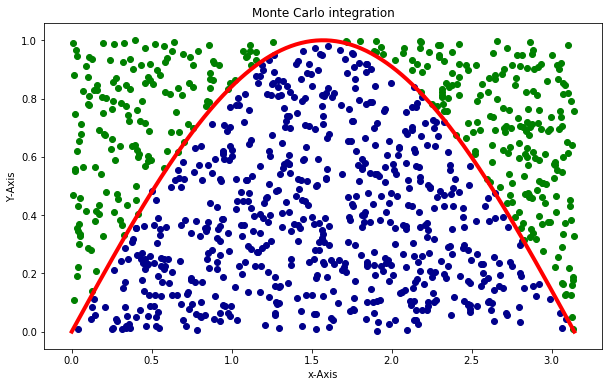

In [9]:

def integrate(num_samples=int(1e3), isPlot=False):
    a = makeDataPoints(num_samples)
    
    countUnder = a.IsUnder.sum() #counting ammount under
    countRandX = a.IsUnder.count() #counting total trials
    precentUnder = countUnder/countRandX #precent that the trials are under
    square = 1 * math.pi #the area of the uniform distribution 
    
    estimate = square * precentUnder
    sample_var =[np.var(a.RandomX),np.var(a.RandomY)]
    
    if(isPlot):
        fig, ax = plt.subplots(figsize=(10,6))
        x = np.linspace(0, math.pi, num=400)
        y = np.sin(x)
        plt.plot(x,y,color="red",linewidth=4)


        dfUnder = a[a['IsUnder'] == True]
        dfOver = a[a['IsUnder'] == False]
        
        plt.scatter(dfUnder["RandomX"],dfUnder["RandomY"], color ='darkblue')
        plt.scatter(dfOver["RandomX"],dfOver["RandomY"], color ='green')
        ax.set_title("Monte Carlo integration")
        ax.set_ylabel("Y-Axis")
        ax.set_xlabel("x-Axis")
        
        print("With",num_samples,"the estimate for the integral of sin(x) is",estimate)
        print("The sample variance for Random variable x is",sample_var[0])
        print("The sample variance for Random variable x is",sample_var[1])
        
        return estimate, sample_var,fig
    
    print("With",num_samples,"the estimate for the integral of sin(x) is",estimate)
    print("The sample variance for Random variable x is",sample_var[0])
    print("The sample variance for Random variable x is",sample_var[1])
    return estimate, sample_var 
    


    
integrate(1000,isPlot=True)

In [10]:
integrate(10000)

With 10000 the estimate for the integral of sin(x) is 1.99491133503
The sample variance for Random variable x is 0.8259132673362345
The sample variance for Random variable x is 0.08503672184146488


(1.9949113350295187, [0.8259132673362345, 0.08503672184146488])

I start my integrate function by first creating a dataframe using the helper functions I created above the integrate function,this dataframe has 4 attributes,(RandomX,RandomY,Sin(RandomX),IsUnder), random variable x and y is generated using random.uniform with its bounds,Sin(randomX) is an attribute where i plug in random variable x into sign y, and the last attribute is a boolean that is true if RandomY is less then sin(RV X) (meaning its under the curve).I then found the precent of values that are under the surve by using sum() on the IsUnder attrbute divided by the total number of variables. once i had that i multipied that precent by the area of the square to get my estimate.

**Part D**: In the simulation above, what is distribution of the random variable we're actually sampling and what is/are its parameters?  

it is a contunious uniform distribution, with its paramagers being a and b, witch are the minium and the maxium value, but the rv that were actually sampling looks like it is a Binomial Distribution with the paramaters being n = total number of dots and p is [random.uniform(0,math.pi) X random.uniform(0,1)], x = the points under the curve


**Part E**: Compute the expected value of the random variable you described in **Part D** by hand.  Does this value agree with the exact value of the integral you computed in **Part A** and the estimated value you computed in **Part C**? 

In [5]:
df = makeDataPoints(10000)

c =(math.pi-0) + (1-0)
d = c/2

print("The expected value is the",d,"witch is about the same as the values i got fom Part A and Part C")


The expected value is the 2.0707963267948966 witch is about the same as the values i got fom Part A and Part C


**Part F**: Compute the variance of the random variable you described in **Part D** by hand.  Does this value agree with the sample variance observed in **Part C**? 

In [30]:
(1/12)*(math.pi-0)**2


-3.0902323061678132

as you can see from the calcuations above this cell 

using $\pi$ as **b** and 0 as **a** my variance was the same as the one i calcuated using ten thousand trials

the formula for variance of a uniform distribution is
$ var(x) = \frac{(b-a)^2}{12} $ and that is the one i used to find var(x) above


### [25 points] Problem 2 - Sampling Freshies
***

Ralphie the buffalo stands alone in a field. Snow has come to Colorado and flakes collect on her majestic horns and beard. She shivers them off not because she is cold but just because her buffalo reflexes have been honed by millenia of adaptation. She is a biological machine. An inspiration. HAHAHA

She wanders into her barn-mansion, hungry. There is hay from the autumn harvest. This is no ordinary hay, of course. It must be inspected with statistical care so that it is with high probability of the finest quality. You see, Ralphie's hay has a freshness score, measured in Freshies, named after Hayward Freshmann. The average piece of hay from her current supplier is 91 Freshies, and the standard deviation is 6 Freshies. 

You are new on the job, excited to apply your CSCI 3022 knowledge, and keen to prove yourself in a big and changing world. You are in charge of sampling the hay. Your boss, Governor John Hickenlooper, tells you that you must take a sample of hay and that the average freshness must be no less than 90 Freshies. If the average is below 90 Freshies, the bale of hay must be thrown away, rejected. The current system, when you arrive is to sample 30 pieces of hay from each bale to see if the average freshness is above the 90 Freshies threshold. 

**Part A**:  Say "Freshies Threshold" at least 10 times in a row, as quickly as possible. Do not show your work. 



**Part B**: What is the probability that a bale of hay is rejected under the current system of 30 samples?

**0.432** is the probablity that the hay is rejected with all the population, to find this value i found the z score of 91 $z=(\frac{90-91}{6}) = 0.17 $,i looked up that value from the standard normal table (0.06749), 
and then subttracted half of the normal distribution (.5) from that value to get **0.432**

**incoprating the sample:**

**first we must find out the the precent that lies within our sample,with 30 samples, the probality of half the samples is $z=(\frac{76-91}{6}) = -2.5 $ the value that corresponds to 2.5 is 0.49379 so we will use this insead of 0.5 and subtract that from what we found above to be the precent of the population between 91 and 90 (0.06749)**

**0.49379 - 0.06749 = 0.4263**

**the probablity that the bay of hay is rejected with 30 samples is 0.4263**

**Part C**: Well, that's not good enough. Not for our Ralphie. You propose to Governor Hickelooper that you will get hay from a new supplier. The new supplier's hay has a standard deviation of 6 Freshies, just like the old one. But, they can harvest the hay from various parts of the field, to adjust the average Freshy level of the hay, $\mu$. Gov. Hickenlooper's requirement is that the probability that a bale of hay is rejected is less than 0.001. What is the minimum average Freshy level $\mu$ needed in order to achieve the Governor's requirement?


$$ 0.001 = 0.5 - (value~ from~ normal~ table~ as~ P)  $$
$$ 0.001 - 0.5 = - (P)  $$
$$ P = 0.5 - 0.001  $$
$$ P = 0.499 $$

in the standard normal table,to get us a value of 0.001 we need to use the value 0.49900, witch is the z score of 3.9,and since we are going less then the mean the z score will be negative so we will now solve for $\mu$ based on values z = -3.9, x = 90, and standard deviation of 6

$$z = \frac{X-\mu}{\sigma} $$

$$ -3.9~(6) - 90 = -\mu $$

$$ \mu =  90 +  3.9~(6)$$

$$ \mu = 90 + 23.4 $$

$$ \mu = 113.4 $$

the $\mu$ of **113.4** with $\sigma$ of **6** will result in the probality that the hay rejected when sampling all the population to be less then **0.001**

**Part D**: You are about to submit your report, given your answer above, when you find out that the new supplier is going out of business. Ugh.  You are stuck with the old hay. But the Governor's requirement still stands: the probability that a bale of hay is rejected must be less than 0.001. You decide you'll just take more samples from the existing bales of hay. Surely, the number must be greater than 30, but... what is the minimum number of samples that will ensure that each bale of hay is rejected with probability less than $0.001$?


In [36]:
norm.cdf(0.499)

0.69111030797494544

using  z = norm.ppf(0.001)

$$
Z = \frac {\sqrt{n}~(X - \mu)}{\sigma  } 
$$

$$
 \sqrt{n} = \frac{Z * \sigma}{X - \mu}
$$

$$
\sqrt{n} = \frac{(Z * 6)}{(90 - \mu)}
$$

$$
\sqrt{n} = \frac {-3.0902323061678132 * 6}{90 - 91 }
$$

$$
\sqrt{n} = \frac {-18.54}{-1}
$$

$$
\sqrt{n} = 18.54
$$
$$
n = 343.783285419
$$

so we need to take 344 samples

**[Extra Credt - 2 points] Part E**: Draw an ASCII picture of Ralphie. 

 


### [40 points] Problem 3 - Not-so-Easy Peasy Plinko 
***

[Plinko](http://priceisright.wikia.com/wiki/Plinko), the shining jewel of the gameshow [Price is Right](https://en.wikipedia.org/wiki/The_Price_Is_Right), is a staple of American culture.  Luckily for us, it's also chalk-full of interesting ideas from probability and statistics. The game involves dropping a disc onto an inclined board of pegs and letting it bounce around until it lands in a bin with an associated cash value. Players get to drop some number of discs down the Plinko board and keep their winnings.   

In class we looked at a [simplified version of Plinko](https://github.com/chrisketelsen/csci3022/blob/master/inclass-notebooks/lecture11solutions.ipynb):  

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko1.png)


In real life, Plinko has boundaries, positioned symmetrically around the center $c$ at positions $\ell$ and $r$ s.t. $|c-\ell| = |c+r|$. The effect of the boundaries are that when the Plinko disc hits the boundary, it can only move back toward the center. In other words, if the disc hits the boundary at $\ell$, it can only go right at that level. Likewise, if the disc hits the boundary at $r$, it can only go left at that level. 

For instance, the following board depicts a Plinko game with boundaries at $0.5$ (halfway between the centers of Buckets 0 and 1) and $5.5$ (halfway between Buckets 5 and 6)  The red pegs indicate boundary pegs on which the disc always moves toward the center.   

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko2.png)


**Part A**: Write a simulator of Plinko that models the disc moving through each of the 6 rows of pegs to its final destination in one of the 7 bins. Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$ when the probability of moving left or right when hitting a peg is equal to $p = 0.5$. 

Description of my code for this problem:
so i use np.random.choice(["Right","Left"],6,0.5) to do my simulations.this returns an array of 6 elments that are either "Left" or "Right".

After studying how the piko games works, i figured out that the bucket it lands on, is the sum of all the right drops, so i use np.sum(array == "Right") to get my bucket size. 

i then create a pandas Dataframe with 10k rows witch i then use .apply(piko) on an attribute called bucket, i then graph the bucket column with plot.hist to get a binomdial distribution of the samples

i incorpoarate boundries by using if statments,hard coding, if the array reaches the boundry then i change the value of the array at that index into the direction of the boundry

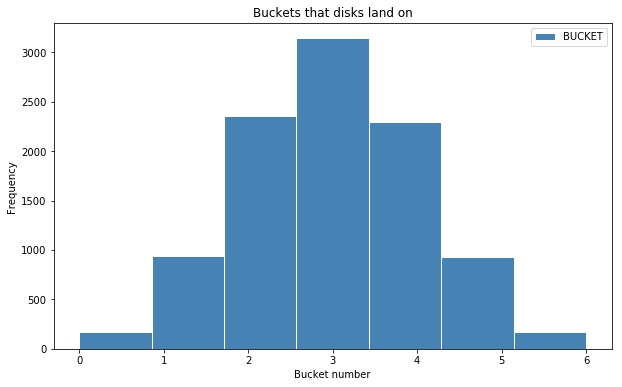

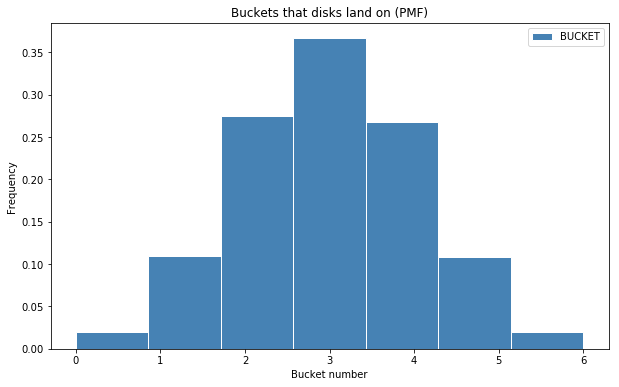

In [17]:
def piko(NumOfTests = 0):
    oneDrop = np.random.choice(["RIGHT","LEFT"],6,0.5)
    bucket = np.sum(oneDrop == "RIGHT")
    return bucket 

fig, ax = plt.subplots(figsize=(10,6))

df = pd.DataFrame(index=range(10000),columns = ["BUCKET"])

df["BUCKET"] = df["BUCKET"].apply(piko)


df.plot.hist(ax=ax,color ="steelblue",edgecolor = "white",bins=7,normed=0);
ax.set_title("Buckets that disks land on")
ax.set_xlabel("Bucket number")

fig1, ax1 = plt.subplots(figsize=(10,6))

df.plot.hist(ax=ax1,color ="steelblue",edgecolor = "white",bins=7,normed=1);

ax1.set_title("Buckets that disks land on (PMF)")
ax1.set_xlabel("Bucket number")

**Part B**: Let $X$ be the random variable corresponding to the Bucket that the disc lands in.  Write down the **true** PMF for $X$. (**Hint**: It might be helpful to reflect back on the discussion from Lecture 11). 

X~BIN(6,0.5) where n  = 6, p = 0.5 and x is the bucket number

E[x] = n * p = 3

**Part C**: Write a simulator for Plinko with boundaries. Your code should be similar to your code from **Part A**, but should take in two variable boundaries, left_bound and right_bound, corresponding to the location of the left boundary and right boundary, respectively. 


In [28]:
def LeftBoundary(trial):
    if ((trial[0] == "LEFT") and 
        (trial[1] == "LEFT") and
        (trial[2] == "LEFT") and
        (trial[3] == "LEFT") and
        (trial[4] == "LEFT") and
        (trial[5] == "LEFT")):
            trial[5] = "RIGHT"
    return trial

def RightBoundary(trial):
    if ((trial[0] == "RIGHT") and 
        (trial[1] == "RIGHT") and
        (trial[2] == "RIGHT") and
        (trial[3] == "RIGHT") and
        (trial[4] == "RIGHT") and
        (trial[5] == "RIGHT")):
            trial[5] = "LEFT"  
    return trial

def pikoWithBoundary(NumOfTests = 0):
    oneDrop = np.random.choice(["RIGHT","LEFT"],6,0.5)
    
    oneDrop = RightBoundary(oneDrop)
    oneDrop = LeftBoundary(oneDrop)
    
    bucket = np.sum(oneDrop == "RIGHT")
    return bucket 



**Part D**: Consider the board with left_bound $= 0.5$ which looks as follows: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko3.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$. Compare the approximate PMF for this board to the no-boundary board from **Part A**. Explain the mechanism that causes the differences between the two PMFs in words. 




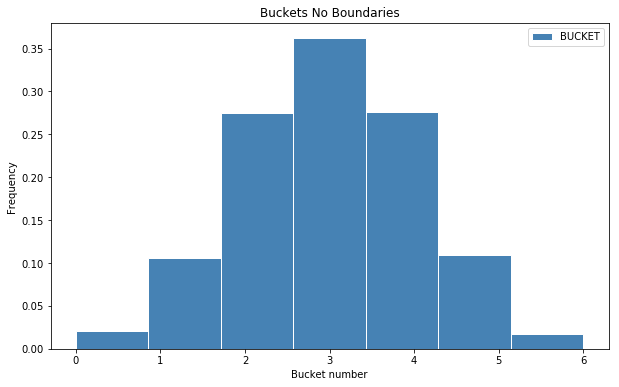

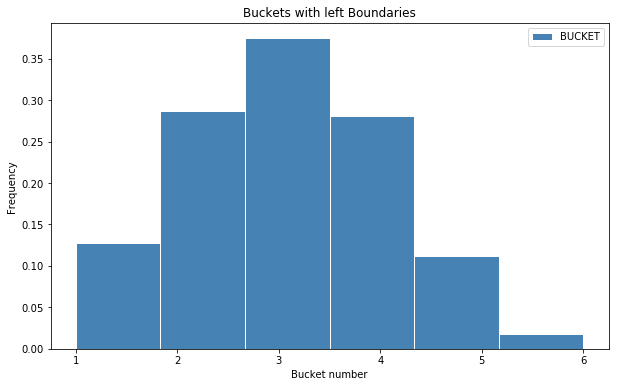

In [19]:
def pikoWithLeftBoundary(NumOfTests = 0):
    oneDrop = np.random.choice(["RIGHT","LEFT"],6,0.5)
    oneDrop = LeftBoundary(oneDrop)
    
    bucket = np.sum(oneDrop == "RIGHT")
    return bucket 

fig, ax = plt.subplots(figsize=(10,6))
df = pd.DataFrame(index=range(10000),columns = ["BUCKET"])
df["BUCKET"] = df["BUCKET"].apply(piko)

df2 = pd.DataFrame(index=range(10000),columns = ["BUCKET"])
df2["BUCKET"] = df2["BUCKET"].apply(pikoWithLeftBoundary)

df.plot.hist(ax=ax,color ="steelblue",edgecolor="white",bins=7,normed=1);
ax.set_title("Buckets No Boundaries")
ax.set_xlabel("Bucket number")

fig1, ax1 = plt.subplots(figsize=(10,6))
df2.plot.hist(ax=ax1,color ="steelblue",edgecolor="white",bins=6,normed=1);
ax1.set_title("Buckets with left Boundaries")
ax1.set_xlabel("Bucket number")


Studying these two graphs, and doing numurical computation with np.sum, it seems like the probality for buckets 2,3,4,5 and 6 is the same for both boundless and left boundary Plinko, where it varies is the bucket 1. for the left boundary Plinko the zero buckets seems to of been added to the one bucket

**Part E**: Now consider the board with left_bound $= 1.5$ which looks as follows: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko4.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$. Compare the approximate PMF for this board to the boards from **Parts A** and **D**. Explain the mechanism that causes the differences between the three PMFs in words. 


P(1 < X < 7) = BIN(6,0.5) is the true PMF of x

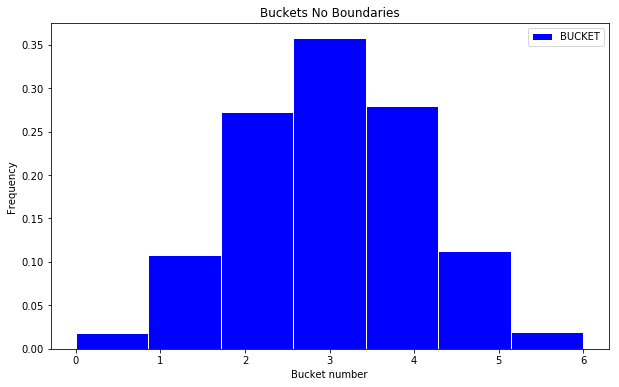

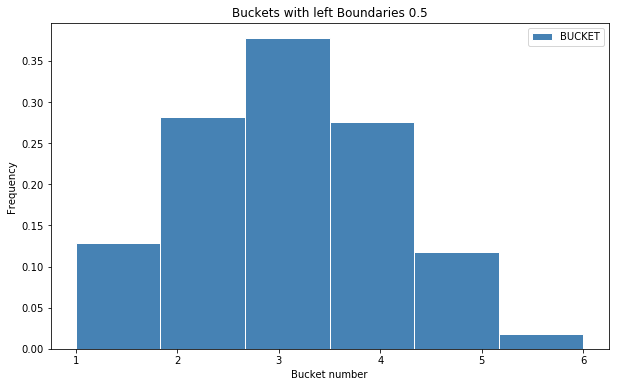

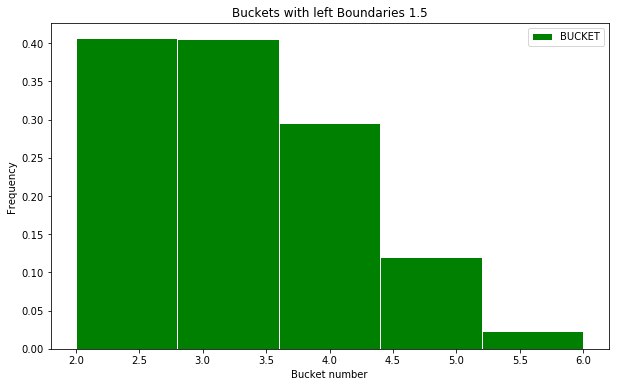

In [20]:
def ELeftBoundary(trial):
    if ((trial[0] == "LEFT") and 
        (trial[1] == "LEFT") and
        (trial[2] == "LEFT") and
        (trial[3] == "LEFT")):
            trial[3] = "RIGHT"
            
    if ((trial[0] == "RIGHT") and 
        (trial[1] == "LEFT") and
        (trial[2] == "LEFT") and
        (trial[3] == "LEFT") and
        (trial[4] == "LEFT")):
            trial[5] = "RIGHT" 
    
    if ((trial[0] == "LEFT") and 
        (trial[1] == "RIGHT") and
        (trial[2] == "LEFT") and
        (trial[3] == "LEFT") and
        (trial[4] == "LEFT")):
            trial[5] = "RIGHT"
     
    if ((trial[0] == "LEFT") and 
        (trial[1] == "LEFT") and
        (trial[2] == "RIGHT") and
        (trial[3] == "LEFT") and
        (trial[4] == "LEFT")):
            trial[5] = "RIGHT"
    
    if ((trial[0] == "LEFT") and 
        (trial[1] == "LEFT") and
        (trial[2] == "LEFT") and
        (trial[3] == "RIGHT") and
        (trial[4] == "LEFT")):
            trial[5] = "RIGHT"
            
    return trial

def pikoLeftBoundaryPartE(NumOfTests = 0):
    oneDrop = np.random.choice(["RIGHT","LEFT"],6,0.5)
    oneDrop = ELeftBoundary(oneDrop)
    
    bucket = np.sum(oneDrop == "RIGHT")
    return bucket 


fig, ax = plt.subplots(figsize=(10,6))
df = pd.DataFrame(index=range(10000),columns = ["BUCKET"])
df["BUCKET"] = df["BUCKET"].apply(piko)

df2 = pd.DataFrame(index=range(10000),columns = ["BUCKET"])
df2["BUCKET"] = df2["BUCKET"].apply(pikoWithLeftBoundary)

df3 = pd.DataFrame(index=range(10000),columns = ["BUCKET"])
df3["BUCKET"] = df2["BUCKET"].apply(pikoLeftBoundaryPartE)

df.plot.hist(ax=ax,color ="blue",edgecolor="white",bins=7,normed=1);
ax.set_title("Buckets No Boundaries")
ax.set_xlabel("Bucket number")

fig1, ax1 = plt.subplots(figsize=(10,6))
df2.plot.hist(ax=ax1,color ="steelblue",edgecolor="white",bins=6,normed=1);
ax1.set_title("Buckets with left Boundaries 0.5")
ax1.set_xlabel("Bucket number")

fig3, ax3 = plt.subplots(figsize=(10,6))
df3.plot.hist(ax=ax3,color ="Green",edgecolor="white",bins=5,normed=1);
ax3.set_title("Buckets with left Boundaries 1.5")
ax3.set_xlabel("Bucket number")

**Part F**: OK, one more. Consider the board with left_bound $= 1.5$ and right_bound $= 5.5$ which looks as follows: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko5.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Use your observations from **Parts A-D** to write down the **true** PMF of $X$. 




P(1 < X < 6) = BIN(6,0.5) is the true PMF of x

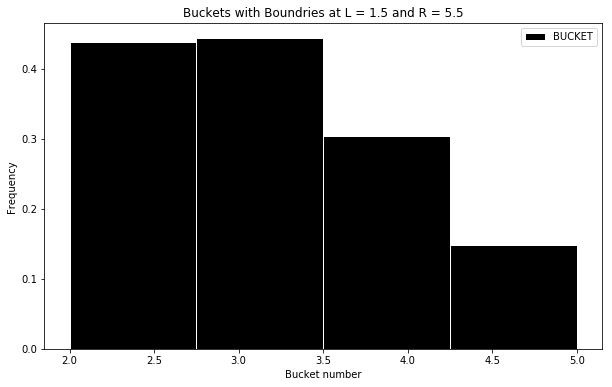

In [50]:
def pikoForPartF(NumOfTests = 0):
    oneDrop = np.random.choice(["RIGHT","LEFT"],6,0.5)
    oneDrop = ELeftBoundary(oneDrop)
    oneDrop = RightBoundary(oneDrop)
    
    bucket = np.sum(oneDrop == "RIGHT")
    return bucket 

df = pd.DataFrame(index=range(10000),columns = ["BUCKET"])
df["BUCKET"] = df["BUCKET"].apply(pikoForPartF)

fig, ax = plt.subplots(figsize=(10,6))


df.plot.hist(ax=ax,color ="black",edgecolor="white",bins=4,normed=1);
ax.set_title("Buckets with Boundries at L = 1.5 and R = 5.5")
ax.set_xlabel("Bucket number")



**Part G**: Suppose I challenge you to a _friendly_ game of Plinko on the board from **Part F**. I offer to pay you a dollar amount equal to the bucket that your disc lands in, but also charge you a flat fee for each disc that you play.  How much should I charge you per disc so that we break even in the long run? 

supose x is the value of each disk

then we know that x - (winnings) must be equal to zero

and that the winnings is the probality of the bucket, times the dollar amount 

In [68]:
a = np.sum(df["BUCKET"]==2) /10000
b = np.sum(df["BUCKET"]==3) /10000
c = np.sum(df["BUCKET"]==4) /10000
d = np.sum(df["BUCKET"]==5) /10000

winnings = (a*2) + (b*3) + (c*4) + (d*5)

there for x must be equal to winnings in order for us to break even in the long run 

since x - winnings = 0

In [69]:
print("we need to set the disc price to",winnings,"inorder for us to break even in the long run")

we need to set the disc price to 3.1213 inorder for us to break even in the long run


### Challenge Problem - Real-Deal Plinko 
***

Implement a full-blown Plinko simulator based on the actual board from Price is Right, which allows you to choose where to place the disc at the top of the board.  

![alt text](https://i.pinimg.com/736x/7d/4b/5b/7d4b5b9ba5cdeceea16433eaadeeaf13--mash-game-plinko-game.jpg)

You can actually do this using mostly your code from **Problem 3** and some careful handling of the boundaries relative to where you drop the disc.  Investigate questions like "What is the optimal position to drop the disc to maximize expected winnings?" and "What are the expected winnings if you play Plinko optimally?"

Once you're done with that, it's time to go full-on Meta-Plinko.  Suppose the boundaries of the Plinko board are in their true positions from the real game show, but the board can have an arbitrary number of rows.  Is there a minimum number of rows the board can have at which point the PMF for the distribution becomes approximately uniform?  If not, is there a Bucket, or set of Buckets, that always have a greater chance of claiming the disc? 
